In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load files

In [3]:
df_list = []

for i in range(4):
    filename='state'+str(i)+'.dat'
    headers = pd.read_csv(filename,sep=' ',skipinitialspace=True, nrows=0).columns[2:]
    df = pd.read_csv(filename,sep=' ',skipinitialspace=True, header=None,skiprows=1,names=headers,comment='#')  
    df_list.append(df)
    #data = df.filter(regex='cphi|sphi|cpsi|spsi|cchi|schi|dd').values
    

In [4]:
df_list[0]

,time,psi-1,phi-2,psi-2,phi-3,psi-3,phi-4,psi-4,phi-5,psi-5,...,dd_160-162,dd_160-164,dd_160-165,dd_160-166,dd_162-164,dd_162-165,dd_162-166,dd_164-165,dd_164-166,dd_165-166
0,0.0,2.509812,-2.088535,2.486109,-1.694423,2.178605,-1.508015,-0.422997,-1.293983,-0.875742,...,0.144997,0.482457,0.588459,0.518260,0.612370,0.709194,0.657335,0.131290,0.125881,0.223806
1,1.0,2.393060,-2.046994,2.299453,-1.408292,1.945118,-1.232107,-0.572309,-1.306164,-0.735425,...,0.137117,0.472124,0.577450,0.505777,0.603323,0.702844,0.642512,0.124796,0.127063,0.215655
2,2.0,2.785762,-2.326477,2.101606,-1.252649,1.844693,-1.307169,-0.226144,-1.541078,-0.511916,...,0.141489,0.473768,0.573486,0.496503,0.604664,0.696699,0.635877,0.122352,0.126535,0.221696
3,3.0,2.518054,-2.139498,2.290066,-1.580615,2.091865,-1.325537,-0.737005,-1.038710,-0.532851,...,0.144820,0.495416,0.585086,0.536892,0.627036,0.709299,0.677714,0.126194,0.124700,0.209898
4,4.0,2.832040,-2.346870,2.470765,-1.626689,1.913041,-1.340708,-0.216830,-1.669801,-0.847725,...,0.135521,0.496026,0.587463,0.541900,0.618311,0.699259,0.673182,0.127323,0.123296,0.219948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995.0,3.129985,-2.858250,2.506480,-1.991559,2.084768,-0.758160,-0.605386,-1.537435,-1.078671,...,0.143224,0.489364,0.524303,0.576618,0.616162,0.660394,0.696398,0.130480,0.124298,0.226122
996,996.0,2.759026,-2.461334,2.201868,-1.521831,1.985347,-1.109907,-0.248357,-1.555303,-0.950225,...,0.139004,0.478017,0.543040,0.554629,0.597878,0.673900,0.660148,0.127754,0.126590,0.220223
997,997.0,2.435885,-2.097364,1.765008,-1.120516,2.004078,-1.214800,-0.304701,-1.312860,-0.835860,...,0.143182,0.474744,0.525599,0.566486,0.607803,0.663362,0.695320,0.128988,0.129418,0.220955
998,998.0,2.507522,-1.906771,2.212918,-1.328531,2.243840,-1.640310,-0.015441,-1.555648,-0.795453,...,0.138452,0.474825,0.513462,0.561266,0.601091,0.647523,0.680230,0.124996,0.124848,0.220968


### Plot features

Features relevant to recognize state 0:
	schi2-2
Features relevant to recognize state 1:
	schi2-1
Features relevant to recognize state 2:
	schi2-10
Features relevant to recognize state 3:
	schi1-6

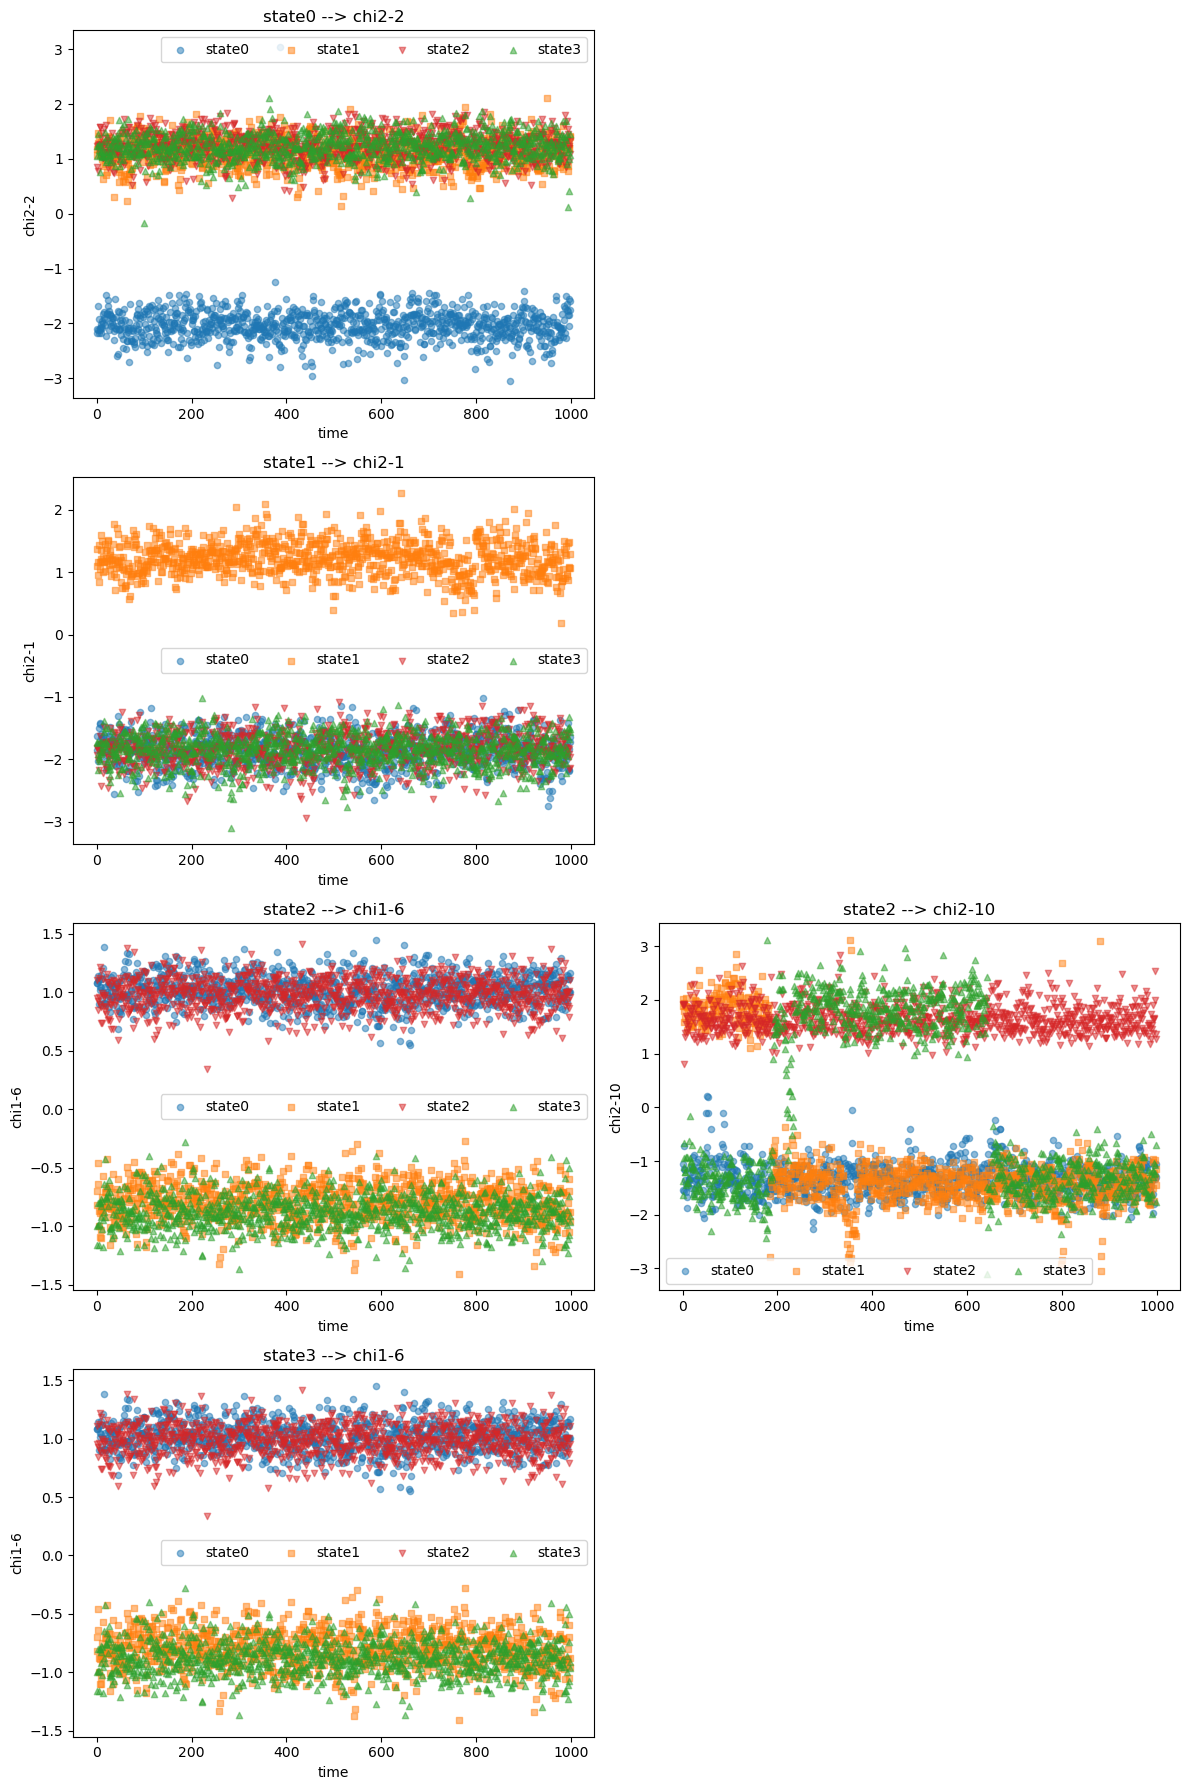

In [7]:
features = [['chi2-2'],['chi2-1'],['chi1-6', 'chi2-10'],['chi1-6']]

nrows=4
ncols=2

fig,axs=plt.subplots(nrows,ncols,figsize=(12,18),dpi=100)

colors=['tab:blue','tab:orange','tab:red','tab:green']
markers=['o','s','v','^']

for i in range(4):
    for j,feature in enumerate(features[i]):
        ax = axs[i,j]
        ax.set_title('state'+str(i)+' --> '+feature)
        for k,df in enumerate(df_list):
            df.plot.scatter(x='time',y=feature,ax=ax,label='state'+str(k),alpha=0.5,color=colors[k],marker=markers[k])
        
        ax.legend(ncol=4)
        
    for j in range(len(features[i]),ncols):
        axs[i,j].axis('off')

plt.tight_layout()
plt.savefig('features.png',bbox_inches=0)